# Usage: quickest tour
Thank you for using CovsirPhy!!  
This is the quickest tour to get an overview of CovsirPhy.

- Download datasets
- Parameter estimation with phase-dependent SIR-derived models
- Simulate the number of cases

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
from pprint import pprint

In [4]:
import covsirphy as cs
cs.__version__

'2.15.0-kappa-fu1'

## Dataset preparation
Download the datasets to "input" directory and load them.
If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Please refer to [Usage: datasets](https://lisphilar.github.io/covid19-sir/usage_dataset.html) for the details.

In [5]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)

We can select the following countries.

In [6]:
pprint(set(jhu_data.countries()) & set(population_data.countries()), compact=True)

{'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Costa Atlantica', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Grand Princess',
 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
 'Haiti', 'Holy See', 'Honduras', 'Hungary', 

## Start scenario analysis
As an example, we will analysis the number of cases in Italy using `Scenario` class. To initialize this class, we need to specify the country name.

In [7]:
snl = cs.Scenario(jhu_data, population_data, country="Italy")

## Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot. Some kind of complement will be done for analysis, if necessary.

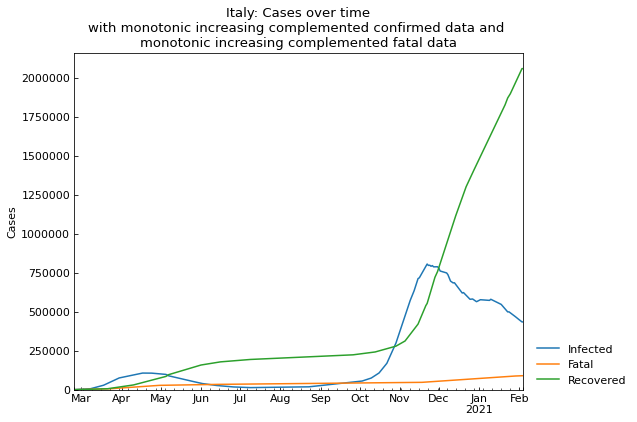

,Date,Infected,Fatal,Recovered
342,2021-01-31,453968,88516,2010548
343,2021-02-01,447589,88845,2024523
344,2021-02-02,437765,89343,2043500
345,2021-02-03,434722,89820,2059248
346,2021-02-04,434722,89820,2059248


In [8]:
df = snl.records()
df.tail()

## S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. This is a significant step of analysis because we assume that ODE parameter values will be changed phase by phase (not daily basis, not constant through the outbreak).  
Details will be explained in [Usage: phases](https://lisphilar.github.io/covid19-sir/usage_phases.html).

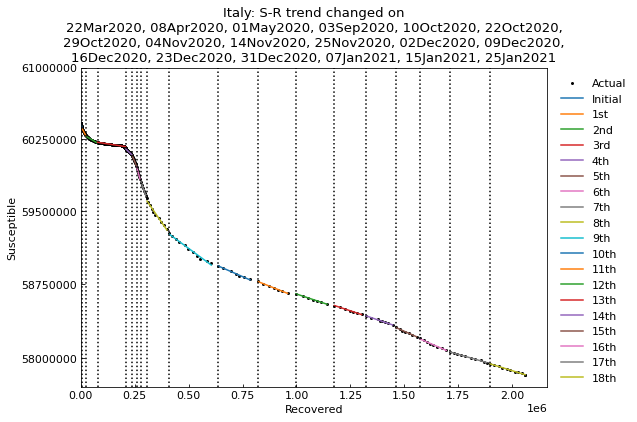

In [9]:
_ = snl.trend()

Summarize the phases.

- Type: "Past" or "Future"
- Start: start date of the phases
- End: end date of the phases
- Population: total population in the phases

In [10]:
snl.summary()

,Type,Start,End,Population
0th,Past,24Feb2020,21Mar2020,60421760
1st,Past,22Mar2020,07Apr2020,60421760
2nd,Past,08Apr2020,30Apr2020,60421760
3rd,Past,01May2020,02Sep2020,60421760
4th,Past,03Sep2020,09Oct2020,60421760
5th,Past,10Oct2020,21Oct2020,60421760
6th,Past,22Oct2020,28Oct2020,60421760
7th,Past,29Oct2020,03Nov2020,60421760
8th,Past,04Nov2020,13Nov2020,60421760
9th,Past,14Nov2020,24Nov2020,60421760


## Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage: SIR-derived models](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [11]:
# Default value of timeout is 180 sec
snl.estimate(cs.SIRF, timeout=60)


<SIR-F model: parameter estimation>
Running optimization with 8 CPUs...


	18th phase (25Jan2021 - 04Feb2021): finished  744 trials in 0 min 30 sec


	 7th phase (29Oct2020 - 03Nov2020): finished  230 trials in 0 min 20 sec

	 6th phase (22Oct2020 - 28Oct2020): finished  229 trials in 0 min 20 sec

	 1st phase (22Mar2020 - 07Apr2020): finished  523 trials in 0 min 50 sec

	 3rd phase (01May2020 - 02Sep2020): finished  560 trials in 1 min  0 sec

	 2nd phase (08Apr2020 - 30Apr2020): finished  599 trials in 1 min  0 sec

	 4th phase (03Sep2020 - 09Oct2020): finished  601 trials in 1 min  0 sec

	 0th phase (24Feb2020 - 21Mar2020): finished  597 trials in 1 min  0 sec

	 5th phase (10Oct2020 - 21Oct2020): finished  594 trials in 1 min  0 sec

	10th phase (25Nov2020 - 01Dec2020): finished  216 trials in 0 min 20 sec

	11th phase (02Dec2020 - 08Dec2020): finished  228 trials in 0 min 20 sec

	 8th phase (04Nov2020 - 13Nov2020): finished  592 trials in 1 min  0 sec

	12th phase (09Dec2020 - 15Dec2020): finished  224 trials in 0 min 20 sec

	13th phase (16Dec2020 - 22Dec2020): finished  222 trials in 0 min 20 sec

	14th phase (23Dec2020 - 30Dec2020): finished  225 trials in 0 min 20 sec

	15th phase (31Dec2020 - 06Jan2021): finished  225 trials in 0 min 20 sec

	 9th phase (14Nov2020 - 24Nov2020): finished  597 trials in 1 min  0 sec

	16th phase (07Jan2021 - 14Jan2021): finished  307 trials in 0 min 20 sec

	17th phase (15Jan2021 - 24Jan2021): finished  206 trials in 0 min 10 sec

Completed optimization. Total: 2 min  3 sec


## History of reproduction number
Let's see the history of parameter values. Reproduction number is here.

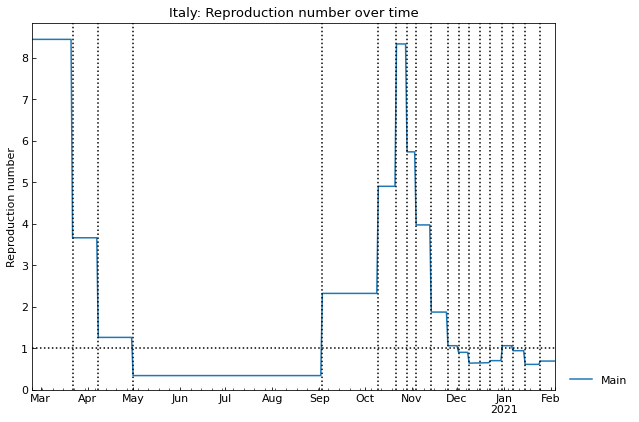

In [12]:
_ = snl.history(target="Rt")

## History of parameters
History of each parameter. Values will be divided by the values in 0th phase.

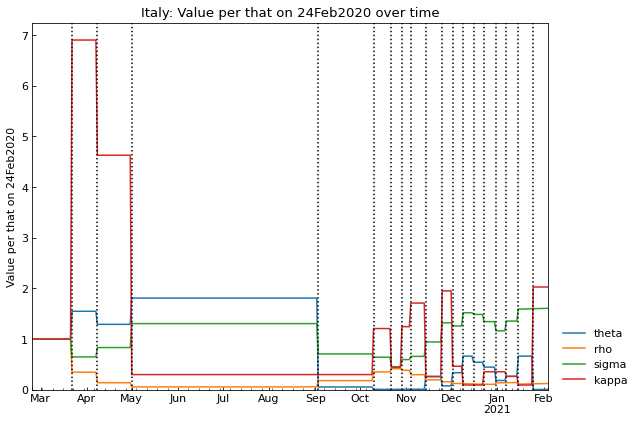

In [13]:
_ = snl.history_rate()

## Simulate the number of cases
How many cases will be in 30 days if the parameter values will not be changed from today?

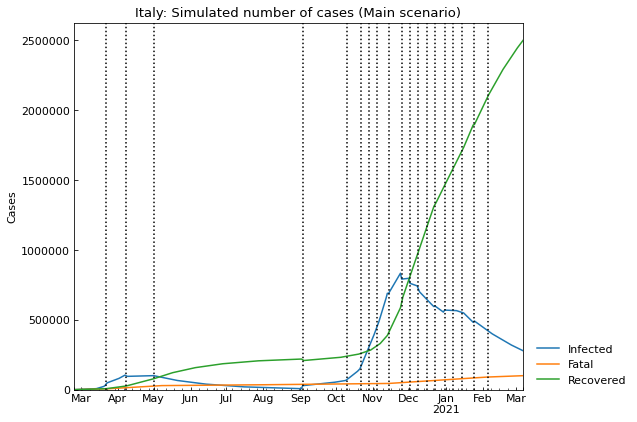

In [14]:
# Add a phase with 30 days from the date of the last record
snl.add(days=30)
_ = snl.simulate()

Next, please see [Usage: scenario analysis](https://lisphilar.github.io/covid19-sir/usage_quick.html) to find details of datasets and how to perform scenario analysis.  
Thank you!